# Uber Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, time

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('My Uber Drives - 2016.csv')

In [3]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
df.columns = df.columns.str.replace("*","")

In [5]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [7]:
df.shape

(1156, 7)

In [8]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [9]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

<AxesSubplot:>

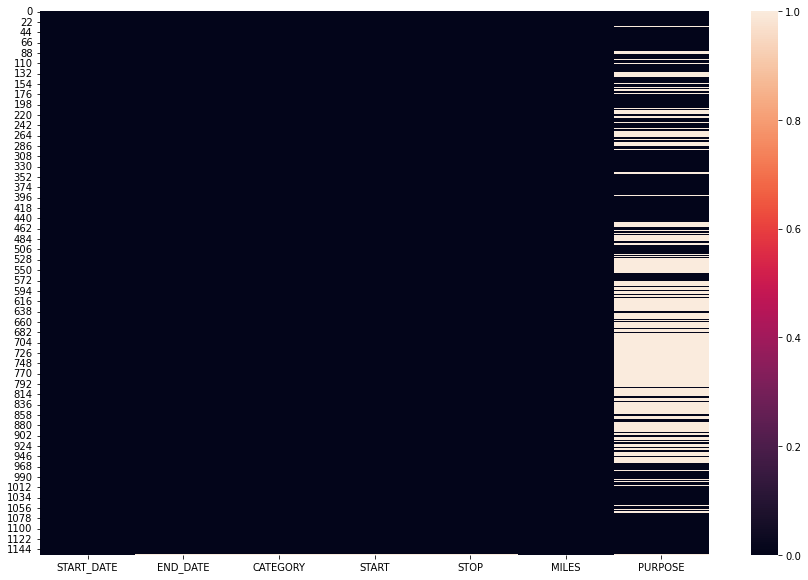

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

In [11]:
df.dropna(axis=0, subset=['END_DATE','CATEGORY','START','STOP'], how='all', inplace=True)

In [12]:
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [13]:
df['PURPOSE'].fillna(method = 'ffill', inplace = True)

**Pandas dataframe.ffill() function** is used to fill the missing value in the dataframe. ‘ffill’ stands for ‘forward fill’ and will propagate last valid observation forward.

**1. ffill() across row axis:**

When ffill() is applied across the index then any missing value is filled based on the corresponding value in the previous row.
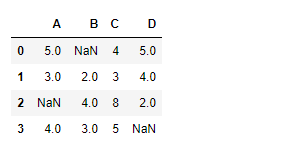

*applying ffill() method to fill the missing values:*  **df.ffill(axis = 0)**

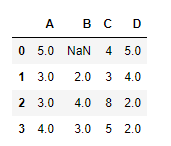
*Notice, values in the first row is still NaN value because there is no row above it from which non-NA value could be propagated.*

**2. ffill() across column axis:**

When ffill is applied across the column axis, then missing values are filled by the value in previous column in the same row.

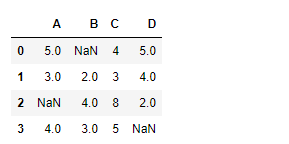

*applying ffill() method to fill the missing values:* **df.ffill(axis = 1)**

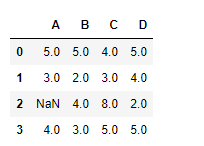

*Notice, the value in the first column is NaN value because there is no cell left to it and so this cell cannot be filled using the previous cell value along the column axis.*

In [14]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [15]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

**pandas.to_numeric()** is one of the general functions in Pandas which is used to convert argument to a numeric type.

**pd.to_numeric(ser, downcast = 'signed')**:

by using downcast = 'signed', all the values will be casted to integer.

**pd.to_numeric(ser, errors = 'ignore')**

Using errors = 'ignore', it will ignore all non-numeric values.

**pd.to_numeric(ser, errors = 'coerce')**

Using errors = 'coerce', it will replace all non-numeric values with NaN

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


## Data Analysis

In [17]:
df['CATEGORY'].value_counts()

Business    1078
Personal      77
Name: CATEGORY, dtype: int64

<AxesSubplot:>

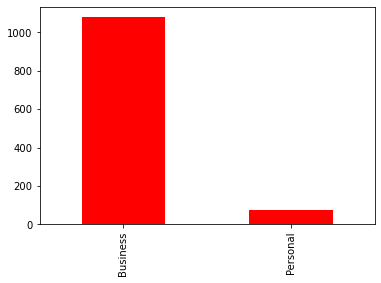

In [18]:
df['CATEGORY'].value_counts().plot(kind='bar', color='r')

In [19]:
start_point = df.START.value_counts()
start_point

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Florence              1
Ridgeland             1
Daytona Beach         1
Sky Lake              1
Gampaha               1
Name: START, Length: 177, dtype: int64

In [20]:
start_point.head()

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Name: START, dtype: int64

<AxesSubplot:ylabel='START'>

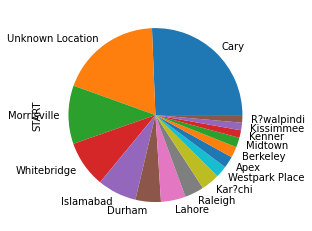

In [21]:
start_point[start_point>10].plot(kind = 'pie')

<AxesSubplot:ylabel='START'>

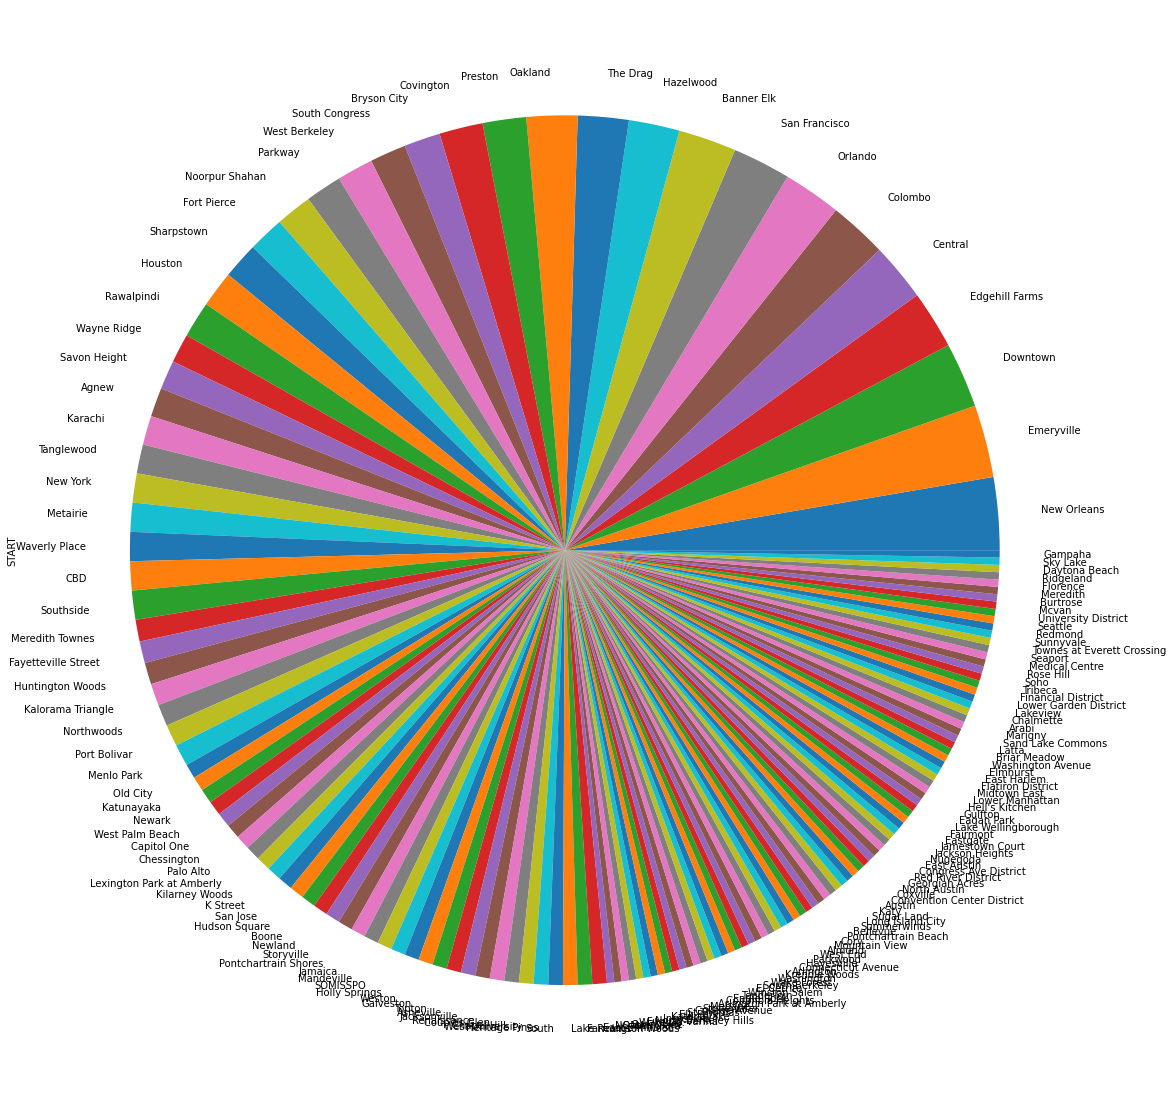

In [22]:
plt.figure(figsize=(20,20))
start_point[start_point<=10].plot(kind = 'pie')

In [23]:
stop_point = df.STOP.value_counts()
stop_point

Cary                 203
Unknown Location     149
Morrisville           84
Whitebridge           65
Islamabad             58
                    ... 
Daytona Beach          1
Sand Lake Commons      1
Sky Lake               1
Vista East             1
Ilukwatta              1
Name: STOP, Length: 188, dtype: int64

In [24]:
stop_point.head()

Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Name: STOP, dtype: int64

<AxesSubplot:ylabel='STOP'>

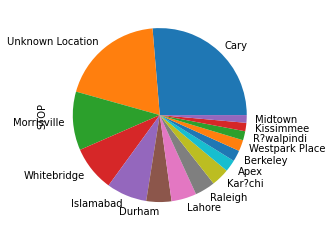

In [25]:
stop_point[stop_point>10].plot(kind = 'pie')

<AxesSubplot:ylabel='STOP'>

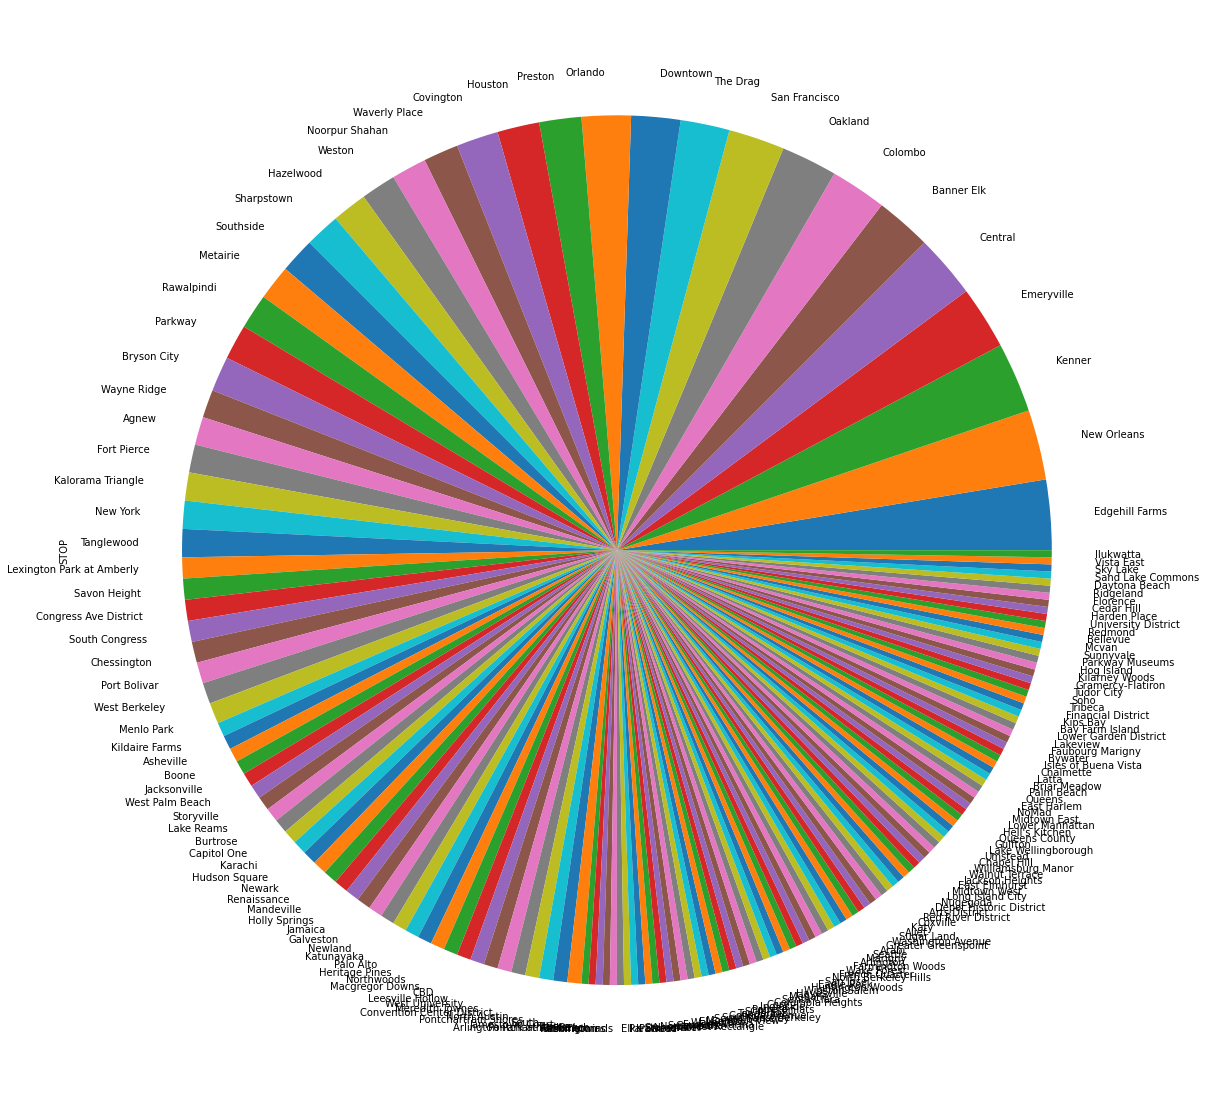

In [26]:
plt.figure(figsize = (20,20))
stop_point[stop_point<=10].plot(kind = 'pie')

In [27]:
miles = df.MILES.value_counts()
miles

9.9     28
3.1     26
2.1     19
10.4    19
3.0     19
        ..
46.9     1
40.2     1
16.6     1
19.3     1
48.2     1
Name: MILES, Length: 256, dtype: int64

<AxesSubplot:>

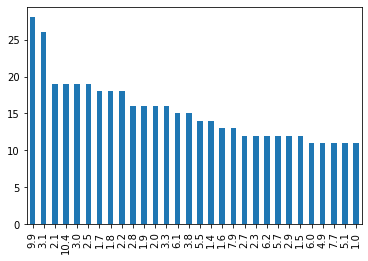

In [28]:
miles[miles > 10].plot(kind = 'bar')

<AxesSubplot:ylabel='MILES'>

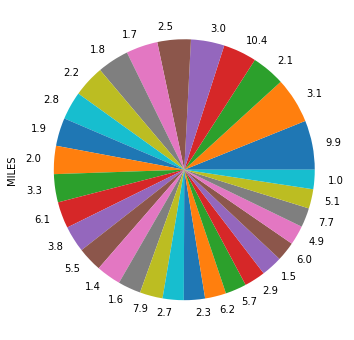

In [29]:
plt.figure(figsize = (6, 6))
miles[miles > 10].plot(kind = 'pie')

<AxesSubplot:>

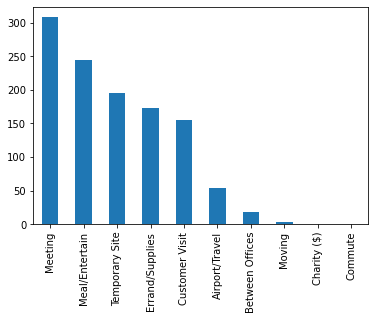

In [30]:
df.PURPOSE.value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='PURPOSE', ylabel='count'>

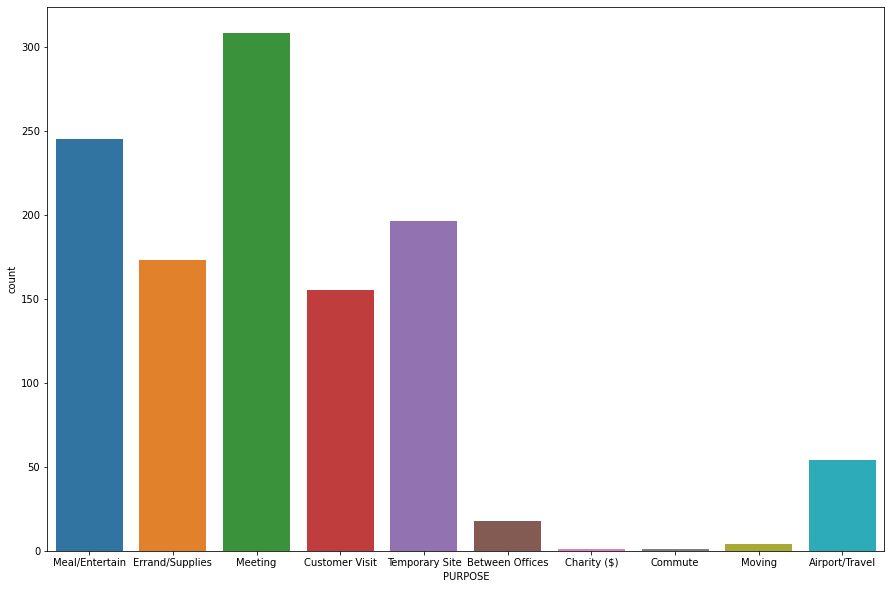

In [31]:
plt.figure(figsize = (15, 10))
sns.countplot(df['PURPOSE'])

In [32]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site


In [33]:
df['MINUTES'] = df.END_DATE - df.START_DATE

In [34]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00


In [35]:
df['MINUTES'] = df['MINUTES'].dt.total_seconds()/60

The **dt.total_seconds() function** is used to return *total duration of each element expressed in seconds.* 

This method is available directly on TimedeltaArray, TimedeltaIndex and on Series containing timedelta values under the.dt namespace.

In [36]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

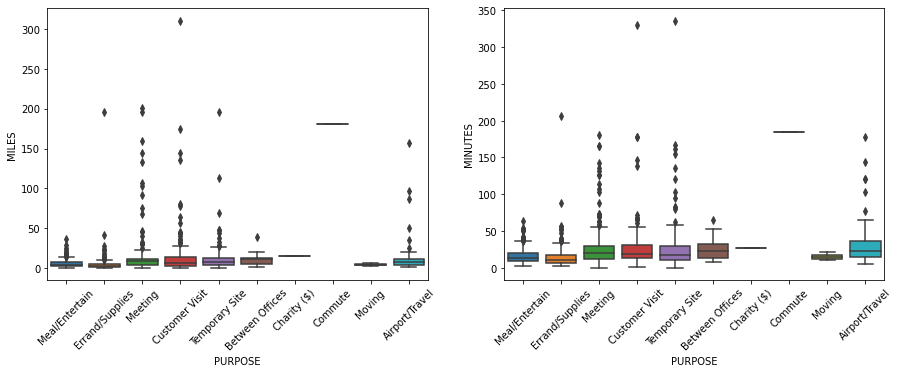

In [37]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(data = df, x = df['PURPOSE'], y = df['MILES'])
plt.xticks(rotation = 45)

plt.subplot(1,2,2)
sns.boxplot(data = df, x = df['PURPOSE'], y = df['MINUTES'])
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

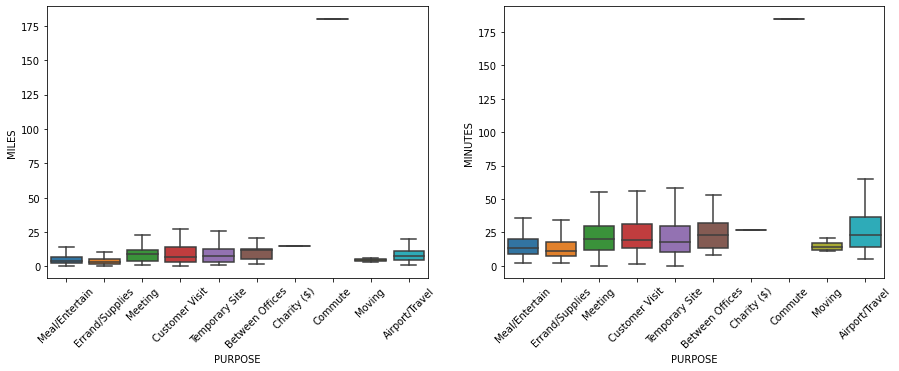

In [38]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(data = df, x = df['PURPOSE'], y = df['MILES'], showfliers = False)
plt.xticks(rotation = 45)

plt.subplot(1,2,2)
sns.boxplot(data = df, x = df['PURPOSE'], y = df['MINUTES'], showfliers = False)
plt.xticks(rotation = 45)

When creating a boxplot in seaborn, we can use the argument **showfliers = False** to remove outlier observations from the plot:

**For each purpose what is minimum miles travelled, mean miles travelled and what is maximum miles travelled?**

In [39]:
pd.DataFrame({'Min': df.groupby(['PURPOSE'])['MILES'].min(),
             'Mean': df.groupby(['PURPOSE'])['MILES'].mean(),
             'Max': df.groupby(['PURPOSE'])['MILES'].max()})

,Min,Mean,Max
PURPOSE,,,
Airport/Travel,0.9,14.953704,156.9
Between Offices,1.9,10.944444,39.2
Charity ($),15.1,15.100000,15.1
Commute,180.2,180.200000,180.2
Customer Visit,0.6,16.065806,310.3
Errand/Supplies,0.5,5.928902,195.3
Meal/Entertain,0.6,5.773878,36.5
Meeting,0.7,12.652597,201.0
Moving,3.3,4.550000,6.1


**For each purpose what is minimum minutes travelled, mean minutes travelled and what is maximum minutes travelled?**

In [40]:
pd.DataFrame({'Min': df.groupby(['PURPOSE'])['MINUTES'].min(),
             'Mean': df.groupby(['PURPOSE'])['MINUTES'].mean(),
             'Max': df.groupby(['PURPOSE'])['MINUTES'].max()})

,Min,Mean,Max
PURPOSE,,,
Airport/Travel,5.0,34.925926,178.0
Between Offices,8.0,25.500000,65.0
Charity ($),27.0,27.000000,27.0
Commute,185.0,185.000000,185.0
Customer Visit,1.0,28.387097,330.0
Errand/Supplies,2.0,15.710983,206.0
Meal/Entertain,2.0,15.926531,64.0
Meeting,0.0,25.954545,181.0
Moving,11.0,15.000000,21.0


**Describe miles travelled for each purpose**

In [41]:
df.groupby('PURPOSE')['MILES'].describe()

,count,mean,std,min,25%,50%,75%,max
PURPOSE,,,,,,,,
Airport/Travel,54.0,14.953704,26.588696,0.9,4.325,7.45,10.875,156.9
Between Offices,18.0,10.944444,8.458913,1.9,5.200,11.60,12.350,39.2
Charity ($),1.0,15.100000,NaN,15.1,15.100,15.10,15.100,15.1
Commute,1.0,180.200000,NaN,180.2,180.200,180.20,180.200,180.2
Customer Visit,155.0,16.065806,33.665367,0.6,3.150,6.90,13.950,310.3
Errand/Supplies,173.0,5.928902,15.429904,0.5,1.900,3.20,5.300,195.3
Meal/Entertain,245.0,5.773878,4.931104,0.6,2.500,4.20,7.200,36.5
Meeting,308.0,12.652597,23.597450,0.7,3.800,8.80,11.600,201.0
Moving,4.0,4.550000,1.181807,3.3,3.900,4.40,5.050,6.1


In [42]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE', 'MINUTES'],
      dtype='object')

In [43]:
def round(x):
    if x['START'] == x['STOP']:
        return 'Yes'
    else:
        return 'No'

In [44]:
df['ROUND_TRIP'] = df.apply(round, axis = 1)

In [45]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES,ROUND_TRIP
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,Yes
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,Yes
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,Yes
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,Yes
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,No


<AxesSubplot:xlabel='ROUND_TRIP', ylabel='count'>

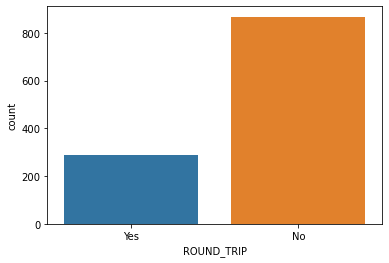

In [46]:
sns.countplot(df['ROUND_TRIP'])

In [47]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES,ROUND_TRIP
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,Yes
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,Yes
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,Yes
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,Yes
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,No


In [48]:
df['MONTH'] = pd.DatetimeIndex(df['START_DATE']).month

**Pandas DatetimeIndex.date** attribute outputs an Index object containing the date values present in each of the entries of the DatetimeIndex object.

**Pandas DatetimeIndex.month** attribute outputs an Index object containing the month values present in each of the entries of the DatetimeIndex object.

**Pandas DatetimeIndex.year** attribute outputs an Index object containing the year values present in each of the entries of the DatetimeIndex object.


In [49]:
dict = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

In [50]:
df['MONTH'] = df['MONTH'].map(dict)

In [51]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES,ROUND_TRIP,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,Yes,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,Yes,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,Yes,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,Yes,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,No,Jan


<AxesSubplot:xlabel='MONTH', ylabel='count'>

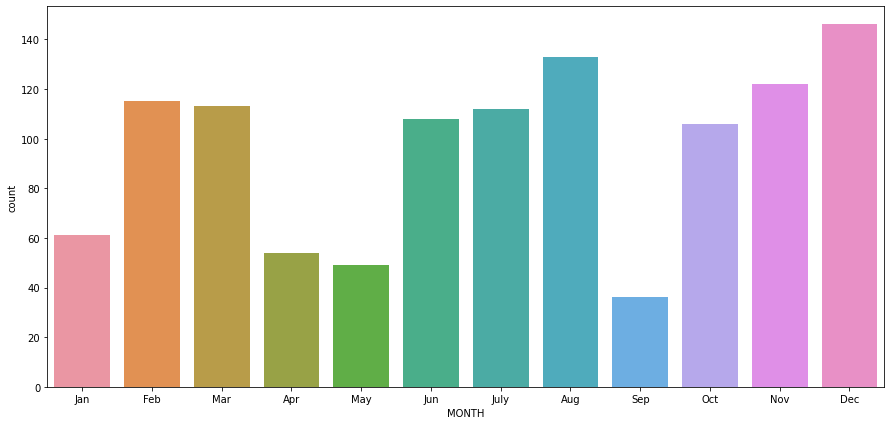

In [52]:
plt.figure(figsize = (15, 7))
sns.countplot(df['MONTH'])

**Round trips for every purpose every month?**

In [53]:
pd.set_option('display.max_rows',None)

In [54]:
df.groupby(['MONTH','PURPOSE'])['ROUND_TRIP'].count()

MONTH  PURPOSE        
Apr    Between Offices     3
       Customer Visit      9
       Errand/Supplies     7
       Meal/Entertain     12
       Meeting            20
       Temporary Site      3
Aug    Airport/Travel     52
       Customer Visit     19
       Meal/Entertain     11
       Meeting            17
       Temporary Site     34
Dec    Airport/Travel      2
       Between Offices     1
       Customer Visit     26
       Errand/Supplies    47
       Meal/Entertain     31
       Meeting            30
       Temporary Site      9
Feb    Between Offices     1
       Customer Visit     14
       Errand/Supplies    15
       Meal/Entertain     25
       Meeting            35
       Temporary Site     25
Jan    Customer Visit     11
       Errand/Supplies    13
       Meal/Entertain     16
       Meeting            18
       Temporary Site      3
July   Charity ($)         1
       Commute             1
       Customer Visit      2
       Errand/Supplies    33
       Meal/Entertai

**Minutes taken to cover miles?**

<AxesSubplot:xlabel='MINUTES', ylabel='MILES'>

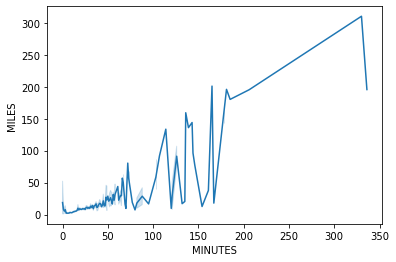

In [55]:
sns.lineplot(data = df, x = df['MINUTES'], y = df['MILES'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

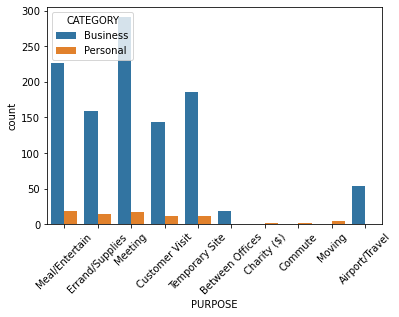

In [56]:
sns.countplot(data = df, x = df['PURPOSE'], hue = 'CATEGORY')
plt.xticks(rotation = 45)

In [57]:
df.describe()

,MILES,MINUTES
count,1155.000000,1155.000000
mean,10.566840,23.243290
std,21.579106,27.318277
min,0.500000,0.000000
25%,2.900000,10.000000
50%,6.000000,16.000000
75%,10.400000,27.500000
max,310.300000,336.000000


### Conclusions
1. December have most bookings - indicates Christmas and end year rush

2. Most bookings are for business

3. Charity, commute and moving are only personal trips

4. Between offices and airport is totally business trips

5. Cary is most frequent start and stop location

6. Seasonal pattern

7. 3-12 miles is the usual distance travelled

8. Most trips are for meeting purposes

9. Usually we don't have round trips

10. Average time is 23 minutes for trips

11. Max cabs were booked for meal and entertainment in month of March.